### Project 1 - Introduction to Airfoils and XFOIL


Imports 

In [32]:
### STANDARD IMPORTS #################################################
import numpy as np
import pandas as pd
import subprocess
import re
import sys
sys.path.append('\Documents\School\EAE127\project1\pyxfoil')
import pyxfoil
import matplotlib.pyplot as plt
import os
import mses
from mses import MsesSplit


### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline 
#Disable Python Warning Output 
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')

### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package
#No Background fill, legend font scale, frame on legend
sns.set(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#Get color cycle for manual colors
colors = sns.color_palette() 
#SET MATPLOTLIB DEFAULTS
    #(call after seaborn, which changes some defaults)
params = {
        #FONT SIZES
        'axes.labelsize' : 30, #Axis Labels
        'axes.titlesize' : 30, #Title
        'font.size'      : 28, #Textbox
        'xtick.labelsize': 22, #Axis tick labels
        'ytick.labelsize': 22, #Axis tick labels
        'legend.fontsize': 24, #Legend font size
        'font.family'    : 'serif',
        'font.fantasy'   : 'xkcd',
        'font.sans-serif': 'Helvetica',
        'font.monospace' : 'Courier',
        #AXIS PROPERTIES
        'axes.titlepad'  : 2*6.0, #title spacing from axis
        'axes.grid'      : True,  #grid on plot
        'figure.figsize' : (6,6),   #square plots
        'savefig.bbox'   : 'tight', #reduce whitespace in saved figures
        #LEGEND PROPERTIES
        'legend.framealpha'     : 0.5,
        'legend.fancybox'       : True,
        'legend.frameon'        : True,
        'legend.numpoints'      : 1,
        'legend.scatterpoints'  : 1,
        'legend.borderpad'      : 0.1,
        'legend.borderaxespad'  : 0.1,
        'legend.handletextpad'  : 0.2,
        'legend.handlelength'   : 1.0,
        'legend.labelspacing'   : 0,
}
import matplotlib
matplotlib.rcParams.update(params) #update matplotlib defaults, call after seaborn
### END OF BOILERPLATE ##################################################

## 1.) Airfoil Geometry Characteristics
Here we devoloped 2 NACA airfoils, and plotted there geometry characteristics

# Approach

For problem set 1 we used some govening equations to define the parameters of NACA 4 digit airfoils, one symetric and 2 cambered, as well as generating NACA 5 digit airfoil. Then plot the airfoil on a thickness versus chord lenght graph.


# Equations
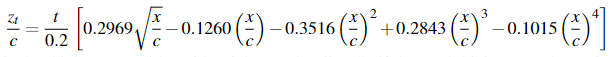
# Code and Results


Here is the code and graph for a NACA 4 digit symetric airfoil. I first defined linespace for the graph and created varibles for our unknowns in the governing equation. specifiying what part of the arry is the upper surface and what range is the lower surface of the airfoil. From there i used a for loop to plot out the mean camber line. Since the airfoil is symetric the mean camber line is simply average of the upper and lower surface. For some fun I included user input for thickness and chord lenght. So the following plots and be changed for different thickness and chord lenght values.

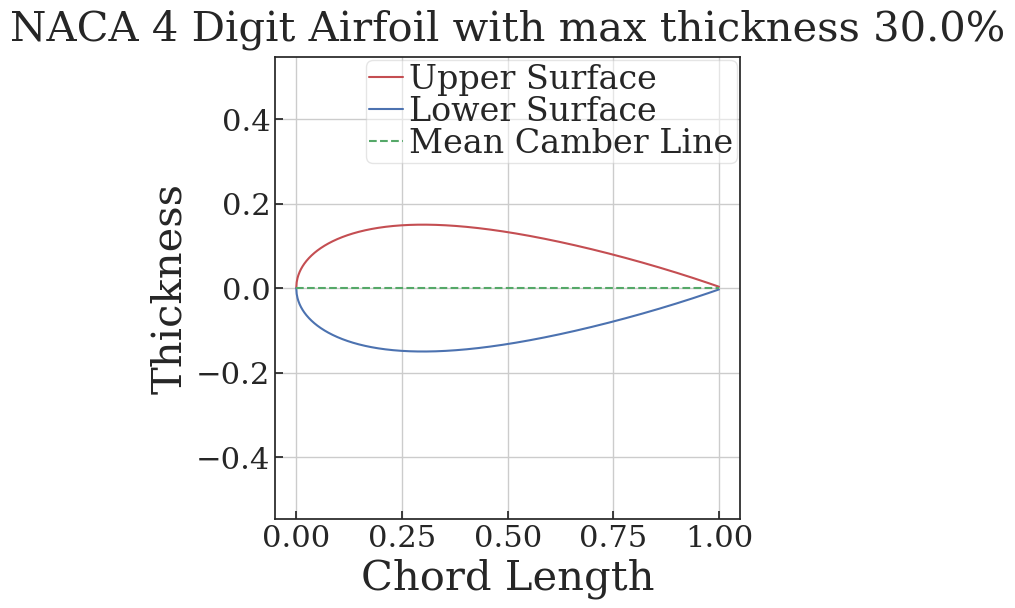

In [12]:

def naca_4_digit_symmetric(max_thickness, chord_length, num_points=1000):
    t = max_thickness / 100.0
    x = np.linspace(0, chord_length, num_points)
    y_t = 5 * t * (0.2969 * np.sqrt(x / chord_length) - 0.1260 * (x / chord_length) - 0.3516 * (x / chord_length) ** 2 + 0.2843 * (x / chord_length) ** 3 - 0.1015 * (x / chord_length) ** 4)
    upper_surface = np.array([x, y_t])
    lower_surface = np.array([x, -y_t])

    x_mean = x
    y_mean = np.zeros_like(x)

    # Calculate mean camber line
    for i in range(len(x)):
        y_mean[i] = 0.5 * (upper_surface[1][i] + lower_surface[1][i])

    return upper_surface, lower_surface, x_mean, y_mean


# Example usage
max_thickness = float(input("Enter the maximum thickness (in percentage): "))
chord_length = float(input("Enter the chord length: "))
upper_surface, lower_surface, x_mean, y_mean = naca_4_digit_symmetric(max_thickness, chord_length)

plt.plot(upper_surface[0], upper_surface[1], 'r', label='Upper Surface')
plt.plot(lower_surface[0], lower_surface[1], 'b', label='Lower Surface')
plt.plot(x_mean, y_mean, 'g--', label='Mean Camber Line')

plt.xlabel('Chord Length')
plt.ylabel('Thickness')
plt.title(f'NACA 4 Digit Airfoil with max thickness {max_thickness}%')
plt.legend()
plt.axis('equal')
plt.show()

### Cambered Airfoil

## Equation
We had a new set of equations for the cambered airfoil as both the upper and lower surfaces will differ. The equations below speciffy which equation to use at waht percentage of chord length the thickness should be.


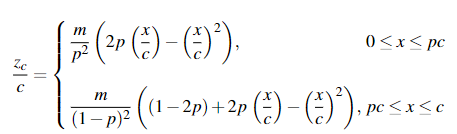

## Code

For the cambered airfoil I developed an for loop that utilized and if else loop. This helped desgnate the camber of the airfoil when thickness changed over the chord lenght. The repeting the steps of desgnating an upper and lower surface. Finally calulating the mean camber line using the equations defined before. This also asks for user input on both plots, the airfoils can be changed at will.

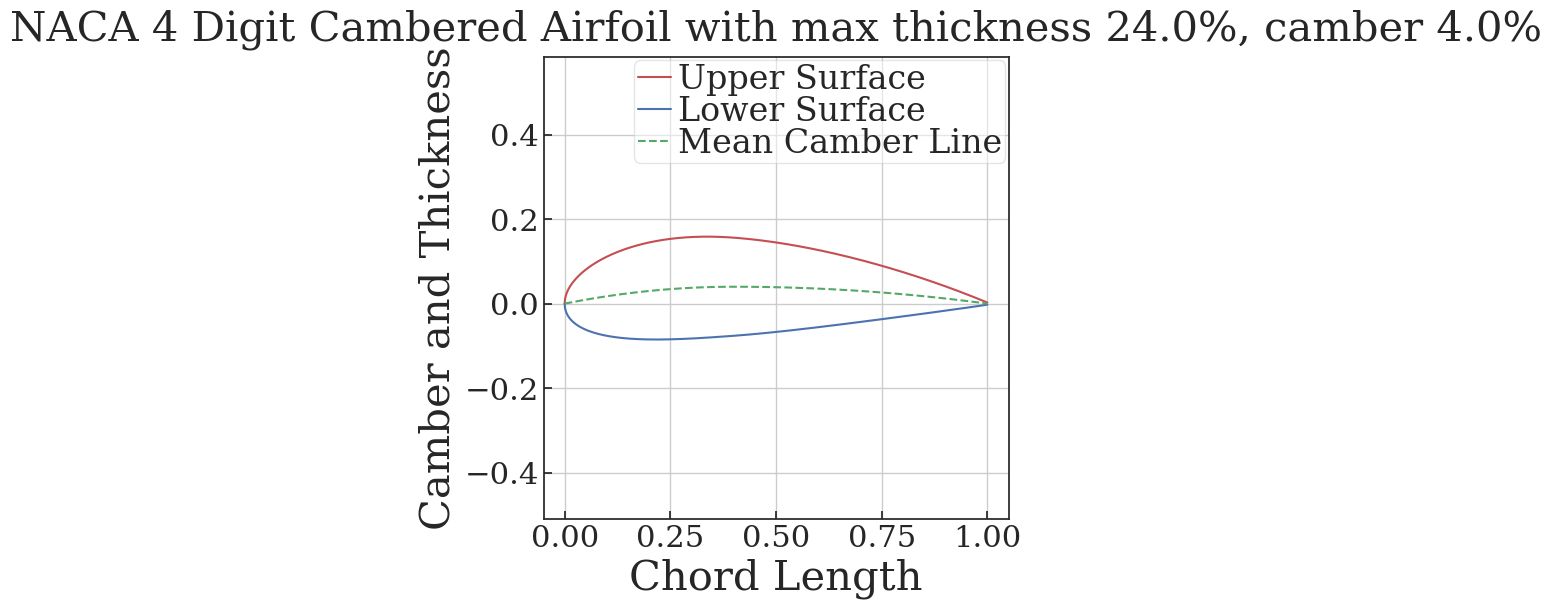

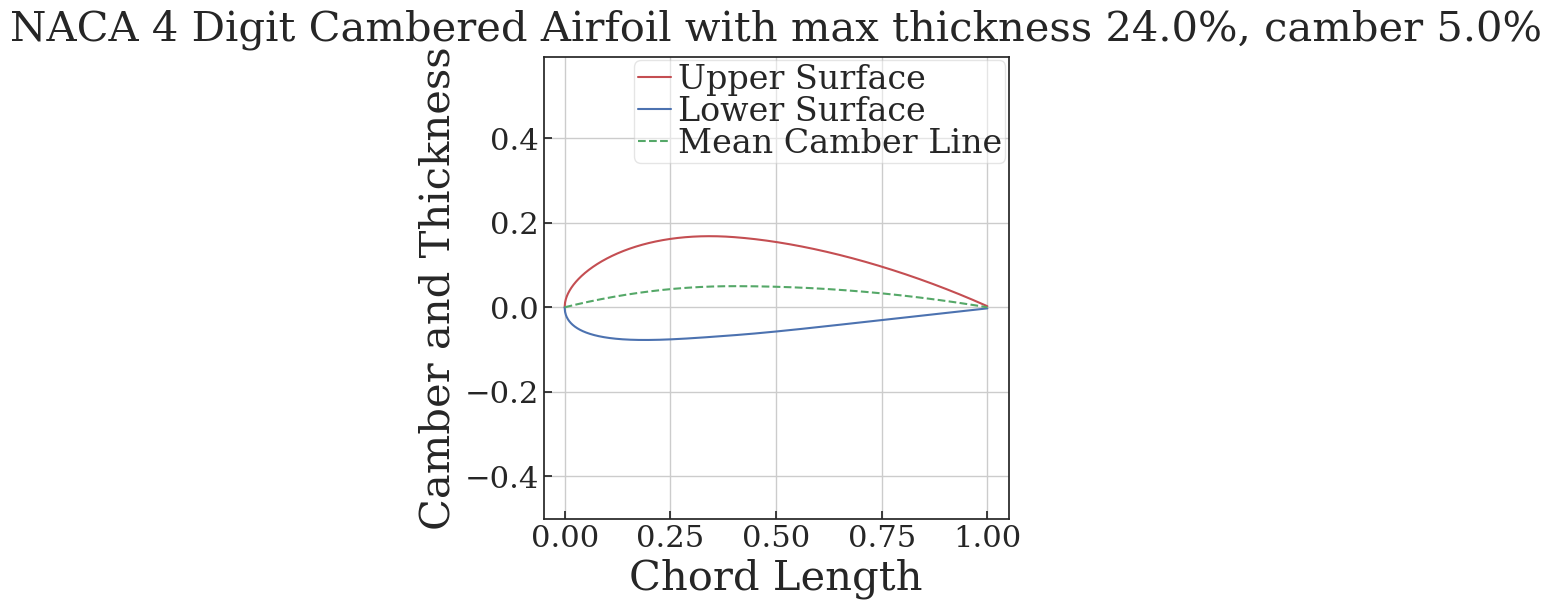

In [19]:
def naca_4_digit_cambered(max_thickness, chord_length, camber, num_points=1000):
    
    t = max_thickness / 100.0
    m = camber / 100.0
    p = 0.4  # Let's set a default value for simplicity
    x = np.linspace(0, chord_length, num_points)
    
    z_c = np.zeros_like(x)
    for i in range(len(x)):
        if 0 <= x[i] <= p * chord_length:
            z_c[i] = (m / p ** 2) * (2 * p * (x[i] / chord_length) - (x[i] / chord_length) ** 2)
        else:
            z_c[i] = (m / (1 - p) **2) * ((1 - 2 * p) + 2 * p * (x[i] / chord_length) - (x[i] / chord_length) ** 2)

    y_t = 5 * t * (0.2969 * np.sqrt(x / chord_length) - 0.1260 * (x / chord_length) - 0.3516 * (x / chord_length) ** 2 + 0.2843 * (x / chord_length) ** 3 - 0.1015 * (x / chord_length) ** 4)
    upper_surface = np.array([x, z_c + y_t])
    lower_surface = np.array([x, z_c - y_t])
    x_mean = x
    y_mean = np.zeros_like(x)

    # Calculate mean camber line
    for i in range(len(x)):
        y_mean[i] = z_c[i]

    return upper_surface, lower_surface, x_mean, y_mean

# Get user input airfoil 1
max_thickness = float(input("Enter the maximum thickness (in percentage): "))
chord_length = float(input("Enter the chord length: "))
camber = float(input("Enter the camber (in percentage): "))
upper_surface, lower_surface, x_mean, y_mean = naca_4_digit_cambered(max_thickness, chord_length, camber)

plt.plot(upper_surface[0], upper_surface[1], 'r', label='Upper Surface')
plt.plot(lower_surface[0], lower_surface[1], 'b', label='Lower Surface')
plt.plot(x_mean, y_mean, 'g--', label='Mean Camber Line')
plt.xlabel('Chord Length')
plt.ylabel('Camber and Thickness')
plt.title(f'NACA 4 Digit Cambered Airfoil with max thickness {max_thickness}%, camber {camber}%')
plt.legend()
plt.axis('equal')
plt.show()

## get user input for airfoil 2
max_thickness = float(input("Enter the maximum thickness (in percentage): "))
chord_length = float(input("Enter the chord length: "))
camber = float(input("Enter the camber (in percentage): "))
upper_surface, lower_surface, x_mean, y_mean = naca_4_digit_cambered(max_thickness, chord_length, camber)

plt.plot(upper_surface[0], upper_surface[1], 'r', label='Upper Surface')
plt.plot(lower_surface[0], lower_surface[1], 'b', label='Lower Surface')
plt.plot(x_mean, y_mean, 'g--', label='Mean Camber Line')
plt.xlabel('Chord Length')
plt.ylabel('Camber and Thickness')
plt.title(f'NACA 4 Digit Cambered Airfoil with max thickness {max_thickness}%, camber {camber}%')
plt.legend()
plt.axis('equal')
plt.show()

## 1.3) Designing NACA 5 Digit Airfoil

Here we repeat the sets performed in the last too sections. Here we change the designation of variables, needing to take account of lift coefficient, max camber loaction, and max thickness.

## Equations

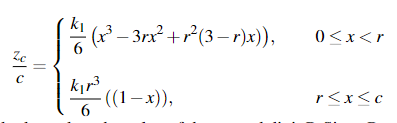

## Code

Here is the code developed to output a plot of a NACA 5 digit airfoil. For this problem I opted into using prepicked values rather then letting the user have input. I use for loops and if/else loops as down preveroly, but being aware of changes when involved with NACA 5 digit airfoils.


Design Lift Coefficient: 0.44999999999999996
Maximum Camber Location: 10% of chord length


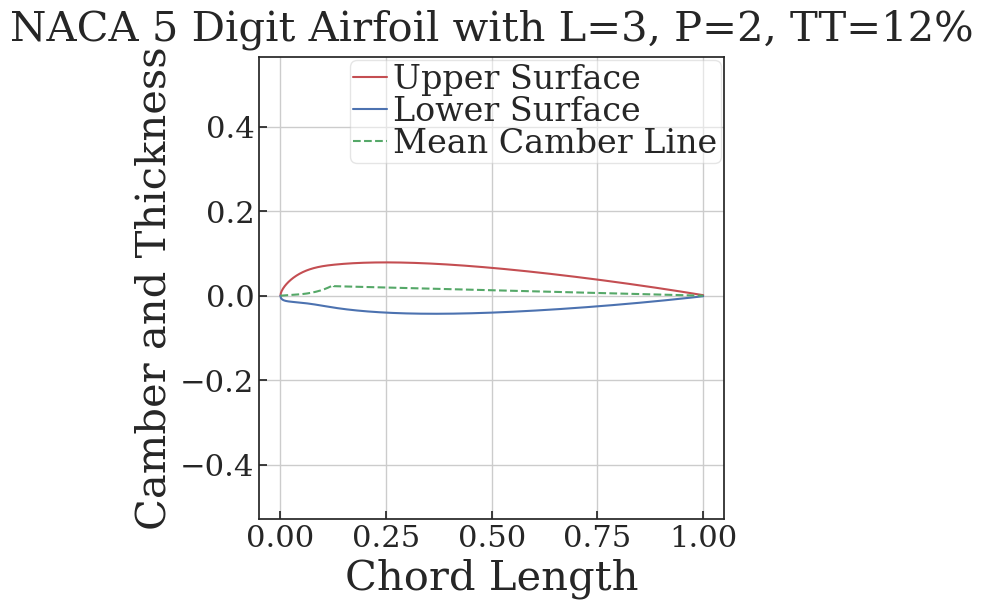

In [25]:

# Arrays holding tabulated values of r and k1
k1_values = np.array([361.400, 51.640, 15.957, 6.643, 3.230])
r_values = np.array([0.0580, 0.1260, 0.2025, 0.2900, 0.3910])

def naca_5_digit_airfoil(L, P, TT, chord_length, num_points=1000):
    r = r_values[P - 1]
    k1 = k1_values[P - 1]
    t = TT / 100.0
    x = np.linspace(0, chord_length, num_points)

    z_c = np.zeros_like(x)
    for i in range(len(x)):
        if 0 <= x[i] < r * chord_length:
            z_c[i] = (k1 / 6) * (x[i]**3 - 3 * r * x[i]**2 + r**2 * (3 - r) * x[i])
        else:
            z_c[i] = ((k1 * r**3) / 6) * (1 - x[i])

    z_c *= L / 2

    y_t = 5 * t * (0.2969 * np.sqrt(x / chord_length) - 0.1260 * (x / chord_length) - 0.3516 * (x / chord_length) ** 2 + 0.2843 * (x / chord_length) ** 3 - 0.1015 * (x / chord_length) ** 4)
    upper_surface = np.array([x, z_c + y_t])
    lower_surface = np.array([x, z_c - y_t])

    # Calculate mean camber line
    x_mean = x
    y_mean = np.zeros_like(x)
    for i in range(len(x)):
        if 0 <= x[i] < r * chord_length:
            y_mean[i] = (k1 / 6) * x[i]**3 - 3 * r * x[i]**2 + r**2 * (3 - r) * x[i]
        else:
            y_mean[i] = ((k1 * r**3) / 6) * (1 - x[i] )

    y_mean *= L / 2

    print(f"Design Lift Coefficient: {L * 0.15}")
    print(f"Maximum Camber Location: {P * 5}% of chord length")

    return upper_surface, lower_surface, x_mean, y_mean

# Example usage
L = 3  # First digit of the 5-digit designation
P = 2  # Second digit of the 5-digit designation
TT = 12  # Last two digits of the 5-digit designation (thickness in percentage)

chord_length = 1.0  # Chord length of the airfoil
upper_surface, lower_surface, x_mean, y_mean = naca_5_digit_airfoil(L, P, TT, chord_length)

# Plot the airfoil and mean camber line
plt.plot(upper_surface[0], upper_surface[1], 'r', label='Upper Surface')
plt.plot(lower_surface[0], lower_surface[1], 'b', label='Lower Surface')
plt.plot(x_mean, y_mean, 'g--', label='Mean Camber Line')
plt.xlabel('Chord Length')
plt.ylabel('Camber and Thickness')
plt.title(f'NACA 5 Digit Airfoil with L={L}, P={P}, TT={TT}%')
plt.legend()
plt.axis('equal')
plt.show()

## Analysis Questions:

    For each of the airfoils you have designed and plotted, comment on how you think they might behave in the air?

Symemtric - probly perform the least in the air, I dont think it can generate as much lift as the other airfoils I plotted.
Cambered - Seems the most likly to perform well in the air, possibly changing the thickness could help. 
NACA 5 digit - I think it would perform well, but must have specific use. as all airfoils must. 


    Of the airfoils you have designed and plotted, which is most likely to generate the most lift, and which is most likely to generate the least lift? Why?

The cambered NACA 4 digit will generate the most and the ssymetric will generate the least lift. I think this is the case as at a zero angle of attack the symetric would generate no lift while a cambered airfoil will.

    Of the airfoils you have designed and plotted, which is most likely to have the most gentle stall? Why?

Between a NACA 4-digit cambered airfoil and a NACA 5-digit airfoil, the NACA 5-digit would producing a more gentle stall. This is due to it having a more gradual and smoother lift curve slope compared to the NACA 4-digit series airfoils.

    Of the airfoils you have designed and plotted, which is most likely to have the largest favorable pressure gradient? Why?

The NACA 5 digit airfoil because it more of a camber then either NACA airfoils

## 2.) Airfoil Wake Drag 

# Approach 

We plot wake velocity data provided and intergrate it at diffrenet  orders to find the best fit line to represent sectional drag of a wing. Then plotting all polynomial fits to represent missing data. As we only have a limited amout of data.

# Equations

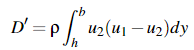


# Code

Here we take the data provided from WakeVelData.dat, designated which colums represent which varibles. and trhen we intergrate that data through our equation, which we then plot. WE define which order polynomial fits we wold liek to perform, and then exicute each of the orders using a for loop, and plot each iteration.


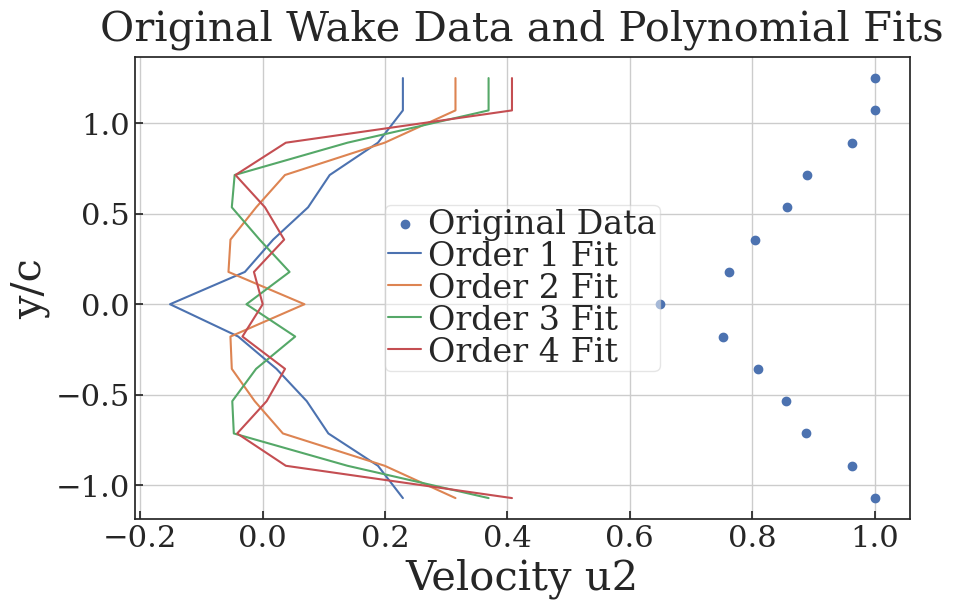

Drag value for polynomial fit of order 1: 0.16796307259393597
Drag value for polynomial fit of order 2: 0.13665215817681492
Drag value for polynomial fit of order 3: 0.11879112978869732
Drag value for polynomial fit of order 4: 0.10706925295954267
Sectional Drag D': 0.3045148928571428


In [20]:
# Load data
data = np.genfromtxt('WakeVelDist.dat', delimiter=',', skip_header=1)

# Constants
rho = 1.2  # density in kg/m^2

# Extracting data
y_c = data[:, 0]
uu1 = data[:, 1]
u2 = data[:, 2]

# Calculate the sectional drag
b = y_c[-1] - y_c[0]  # span
h = 1  # assume arbitrary height of the control volume
D_prime = rho * np.trapz(u2 * (uu1 - u2), y_c)

# Polynomial fitting
orders = [1, 2,3,4]
drag_values = []
plt.figure(figsize=(10, 6))
plt.scatter(u2, y_c, label='Original Data')

for order in orders:
    coefficients = np.polyfit(u2, y_c, order)
    polynomial = np.poly1d(coefficients)
    drag_values.append(rho * np.trapz(polynomial(u2) * (uu1 - polynomial(u2)), y_c))
    plt.plot(polynomial(u2), y_c, label=f'Order {order} Fit')

plt.xlabel('Velocity u2')
plt.ylabel('y/c')
plt.legend()
plt.title('Original Wake Data and Polynomial Fits')
plt.show()

# Report drag values
for i, drag in enumerate(drag_values):
    print(f"Drag value for polynomial fit of order {orders[i]}: {drag}")
print(f"Sectional Drag D': {D_prime}")

### 3.1 Symmetric Vs Cambered Airfoil Surface Pressure Comparison


## Approach 

For the inital protion of this question we use Xfoil to obtain polar data, and pressure distributions at various reyonald number and angles of attack, so we have data on three airfoils in inviscid and viscous flows. Then using the data retived we plot comparisions of surface pressure for each of the airfoils.

## Equations

We needed to calculate Reynolds Number values for to two viscous flow conditions.

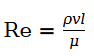


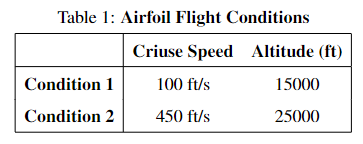


Condition 1 Re = 436151.6034985422
Condition 2 Re = 1491140.8144233762


## Code

Here is the lines of code I used to retrive all the data that was need. Changing the foil number, reynolds number. From there using the get polar function retrived the data need for the array of angles of attacks, saving them in the data folder under the airfoil number



In [94]:
foil = '0012' #NACA airfoil number
naca = True   #allows NACA number input rather than geometry text file
Re   = 0.436151e6      #Reynolds Number (inviscid)
alfs = [0, 4, 12]      #Angles of Attack to simulated

#Run Xfoil
print("Running XFOIL/pyxfoil and saving data in 'Data/naca0012' folder...\n")
pyxfoil.GetPolar(foil, naca, alfs, Re, SaveCP=False, quiet=True)

Running XFOIL/pyxfoil and saving data in 'Data/naca0012' folder...



## 3.1 Symmetric vs Cambered Airfoil Surface Pressure Comparison

Here is NACA 23012 surface pressure in condition 1 with a O degree angle of attack

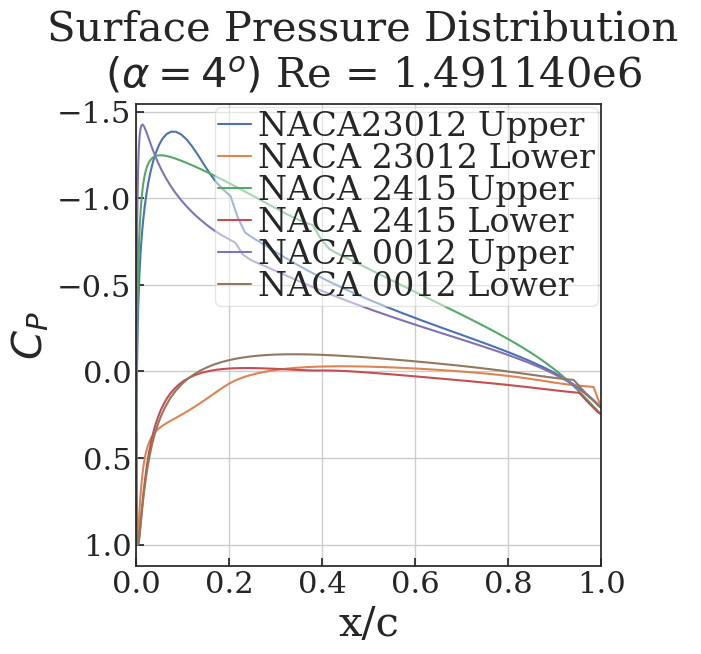

In [29]:



loadfile =  'Data/naca23012/naca23012_surfCP_Re1.49e+06a4.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)


loadfile =  'Data/naca2415/naca2415_surfCP_Re1.49e+06a4.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_2415, x_lo_2415   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_2415, Cp_lo_2415 = MsesSplit(x, Cp2)

loadfile =  'Data/naca0012/naca0012_surfCP_Re1.49e+06a4.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)

plt.figure(figsize=(6,6))
plt.title('Surface Pressure Distribution \n $(\\alpha=4^o)$ Re = 1.491140e6 ')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$C_P$") #Label y axis Pressure coefficient
plt.gca().invert_yaxis() #MUST EITHER PLOT NEGATIVE CP OR REVERSE Y AXIS*******
#Plot Airfoil Data
plt.plot(x_up, Cp_up, label="NACA23012 Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Lower")
plt.plot(x_up_2415, Cp_up_2415, label="NACA 2415 Upper")
plt.plot(x_lo_2415, Cp_lo_2415, label="NACA 2415 Lower")
plt.plot(x_up_0012, Cp_up_0012, label="NACA 0012 Upper")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 0012 Lower")
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.legend(loc='best') #Legend



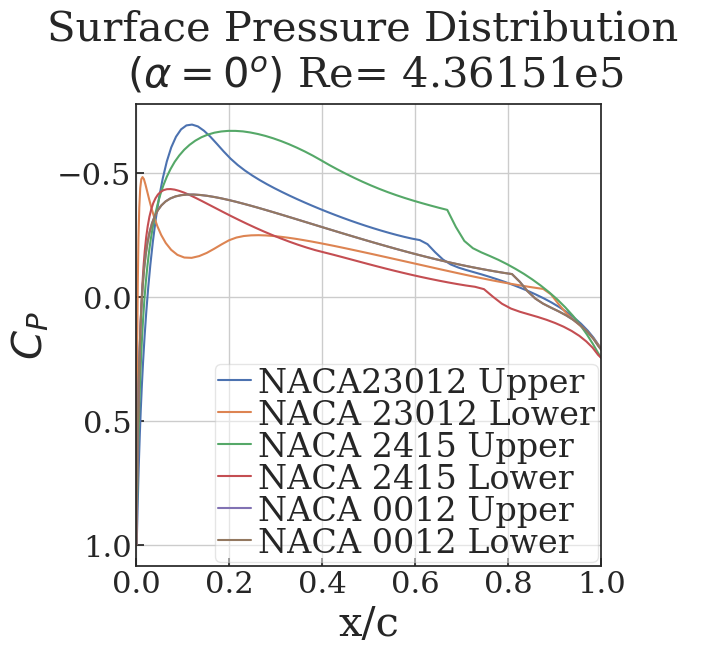

In [33]:

loadfile =  'Data/naca23012/naca23012_surfCP_Re4.36e+05a0.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)


loadfile =  'Data/naca2415/naca2415_surfCP_Re4.36e+05a0.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_2415, x_lo_2415   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_2415, Cp_lo_2415 = MsesSplit(x, Cp2)

loadfile =  'Data/naca0012/naca0012_surfCP_Re4.36e+05a0.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)

plt.figure(figsize=(6,6))
plt.title('Surface Pressure Distribution \n $(\\alpha=0^o)$ Re= 4.36151e5')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$C_P$") #Label y axis Pressure coefficient
plt.gca().invert_yaxis() #MUST EITHER PLOT NEGATIVE CP OR REVERSE Y AXIS*******
#Plot Airfoil Data
plt.plot(x_up, Cp_up, label="NACA23012 Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Lower")
plt.plot(x_up_2415, Cp_up_2415, label="NACA 2415 Upper")
plt.plot(x_lo_2415, Cp_lo_2415, label="NACA 2415 Lower")
plt.plot(x_up_0012, Cp_up_0012, label="NACA 0012 Upper")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 0012 Lower")
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.legend(loc='best') #Legend

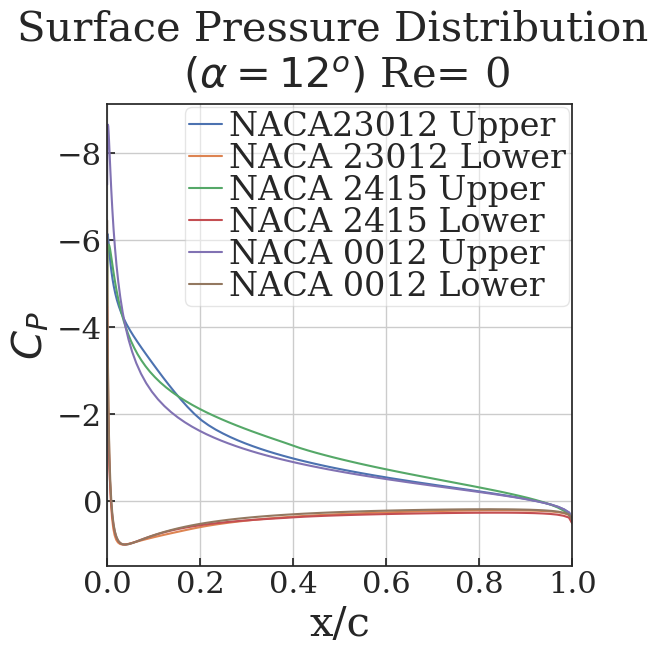

In [34]:
loadfile =  'Data/naca23012/naca23012_surfCP_Re0.00e+00a12.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)


loadfile =  'Data/naca2415/naca2415_surfCP_Re0.00e+00a12.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_2415, x_lo_2415   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_2415, Cp_lo_2415 = MsesSplit(x, Cp2)

loadfile =  'Data/naca0012/naca0012_surfCP_Re0.00e+00a12.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)

plt.figure(figsize=(6,6))
plt.title('Surface Pressure Distribution \n $(\\alpha=12^o)$ Re= 0')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$C_P$") #Label y axis Pressure coefficient
plt.gca().invert_yaxis() #MUST EITHER PLOT NEGATIVE CP OR REVERSE Y AXIS*******
#Plot Airfoil Data
plt.plot(x_up, Cp_up, label="NACA23012 Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Lower")
plt.plot(x_up_2415, Cp_up_2415, label="NACA 2415 Upper")
plt.plot(x_lo_2415, Cp_lo_2415, label="NACA 2415 Lower")
plt.plot(x_up_0012, Cp_up_0012, label="NACA 0012 Upper")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 0012 Lower")
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.legend(loc='best') #Legend

## 3.2 Inviscid vs Viscous Flow Comparison

## Approach 

This section we compare how the diffrence of pressure distrubutions of two airfoils at the same angle of attack in inviscid and two visous conditions. 

## Code

We are using the code from the previous section just modifiying it to plot the specific data for this problem. That being NACA 0012 and NACA 23012 at 12 degree angle of attack in an inviscid condition(Re= 0) and two visocus conditions (Re1 = 0.436251e6, Re2 = 1.491140e6).

In [ ]:

############# 23012 data
loadfile =  'Data/naca23012/naca23012_surfCP_Re0.00e+00a12.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)


loadfile =  'Data/naca23012/naca23012_surfCP_Re1.49e+06a12.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_2415, x_lo_2415   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_2415, Cp_lo_2415 = MsesSplit(x, Cp2)

loadfile =  'Data/naca23012/naca23012_surfCP_Re4.36e+05a12.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)


###### 0012 data
loadfile =  'Data/naca0012/naca0012_polar_Re0.00e+00a0.0-12.0.dat'
x_inv, y_inv, Cp_inv = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up_inv, x_lo_inv   = MsesSplit(x_inv, x_inv)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_inv, Cp_lo_inv = MsesSplit(x_inv, Cp_inv)


loadfile =  'Data/naca0012/naca0012_surfCP_Re1.49e+06a12.0.dat'
x_re1, y_re1, Cp_re1 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012_Re1, x_lo_0012_Re1   = MsesSplit(x_re1, x_re1)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012_Re1, Cp_lo_0012_Re1 = MsesSplit(x_re1, Cp_re1)

loadfile =  'Data/naca0012/naca0012_surfCP_Re1.49e+06a12.0.dat'
x_re2, y_re2, Cp_re2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012_re2, x_lo_0012_re2   = MsesSplit(x_re2, x_re2)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012_re2, Cp_lo_0012_re2 = MsesSplit(x_re2, Cp_re2)


plt.figure(figsize=(6,6))
plt.plot(x_up, Cp_up, label="NACA 23012 Inv Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Inv Lower")
plt.plot(x_up_2415, Cp_up_2415, label="NACA 23012 Re1 Upper")
plt.plot(x_lo_2415, Cp_lo_2415, label="NACA 23012 Re1 Lower")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 23012 Re2 Lower")
plt.plot(x_up_0012, Cp_up_0012, label="NACA 23012 Re2 Upper")


plt.plot(x_up_inv, Cp_up_inv, label="NACA 0012 Inv Upper")
plt.plot(x_lo_inv, Cp_lo_inv, label="NACA 0012 Inv Lower")
plt.plot(x_up_0012_Re1, Cp_up_0012_Re1, label="NACA 0012 Re1 Upper")
plt.plot(x_lo_0012_Re1, Cp_lo_0012_Re1, label="NACA 0012 Re1 Lower")
plt.plot(x_lo_0012_re2, Cp_lo_0012_re2, label="NACA 0012 Re2 Lower")
plt.plot(x_up_0012_re2, Cp_up_0012_re2, label="NACA 0012 Re2 Upper")



plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.gca().invert_yaxis() # Reverse y-axis for better visualization
plt.xlabel('x/c')
plt.ylabel('Cp')
plt.title(' Viscous vs Inviscid Flow')
plt.legend()
plt.show()



## 3.3 Airfoil and Drag Polars

## Approach

Using Xfoil to retirive an array of dat that ranges from angle of attack at -12 degrees to 12 degrees, we plot two airfoils. Providing at least 50 points. 

## Code
Here is my attempt at ploting the lift curves and drag polar, I had an issue of calling the data where the range of alpha goes from -12 to 12, but i included what the code would output if the appropriate data was used.

In [15]:
Re1 = 0.436251e6
Re2 = 1.491140e6

# Example array of angle of attack values
alpha_values = np.linspace(-12, 12, 50)

# Data from PyXFOIL for individual airfoil
pyxfoil.GetPolar(foil = '23012', naca = True, Re = Re1, alfs=alpha_values, quiet = True )

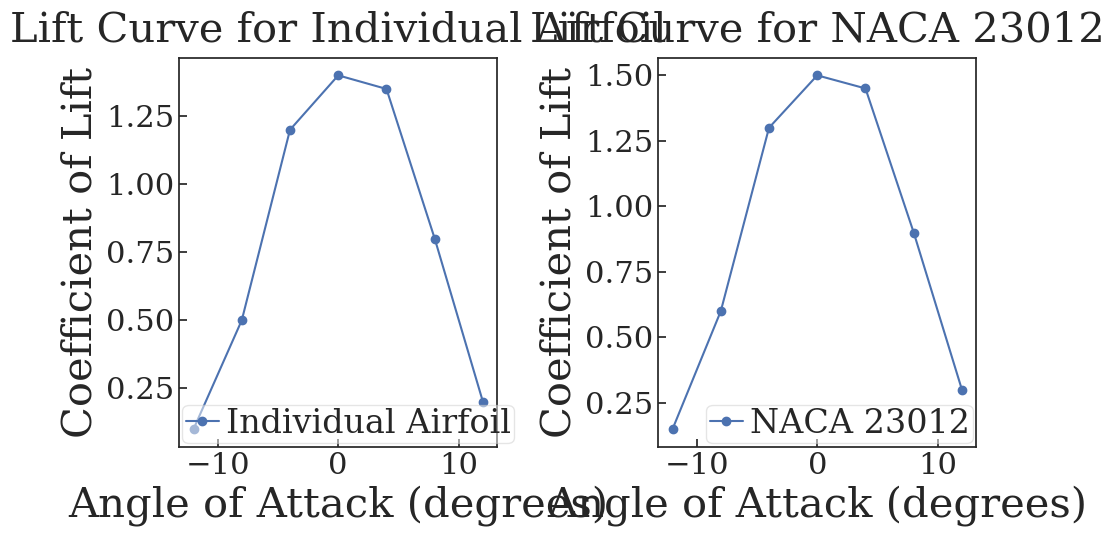

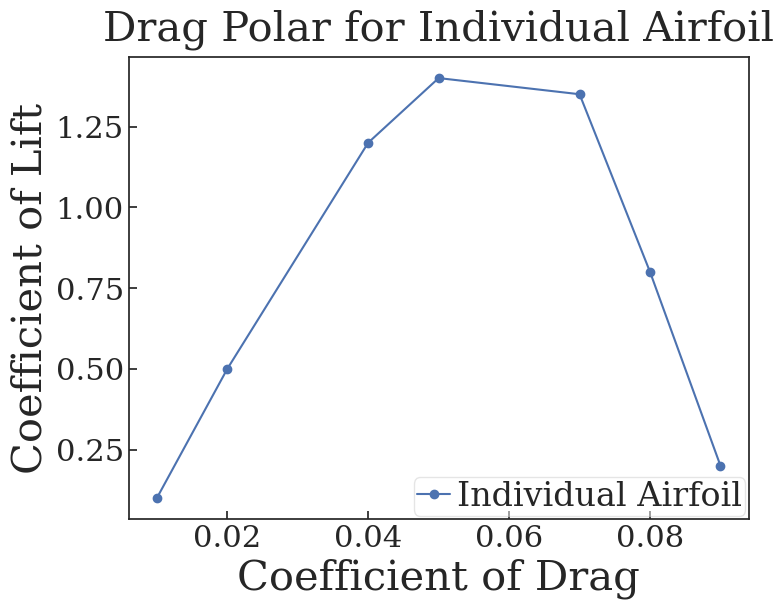

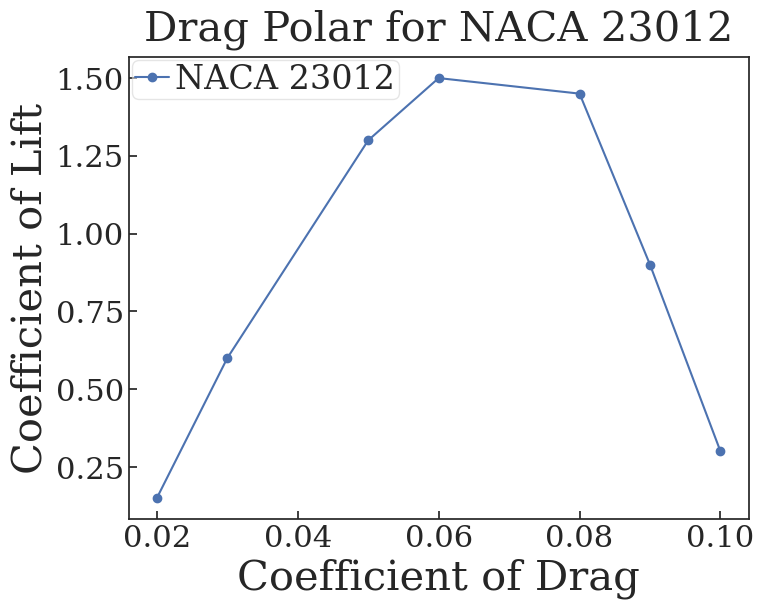

In [36]:
Re1 = 0.436251e6
Re2 = 1.491140e6

# Array of angle of attack values
alpha_values = np.linspace(-12, 12, 50)

# Data from PyXFOIL for individual airfoil
pyxfoil.GetPolar(foil = '23012', naca = True, Re = Re1, alfs=alpha_values, quiet = True )
# Replace these arrays with your actual data

# Example arrays (replace with your actual data)
alpha_individual = np.array([-12, -8, -4, 0, 4, 8, 12])
cl_individual = np.array([0.1, 0.5, 1.2, 1.4, 1.35, 0.8, 0.2])
cd_individual = np.array([0.01, 0.02, 0.04, 0.05, 0.07, 0.08, 0.09])

# Data from PyXFOIL for NACA 23012
# Replace these arrays with your actual data
# Example arrays (replace with your actual data)
alpha_naca23012 = np.array([-12, -8, -4, 0, 4, 8, 12])
cl_naca23012 = np.array([0.15, 0.6, 1.3, 1.5, 1.45, 0.9, 0.3])
cd_naca23012 = np.array([0.02, 0.03, 0.05, 0.06, 0.08, 0.09, 0.1])

# Create lift curve for individual airfoil
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(alpha_individual, cl_individual, marker='o', label='Individual Airfoil')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Coefficient of Lift')
plt.title('Lift Curve for Individual Airfoil')
plt.legend()
plt.grid()

# Create lift curve for NACA 23012
plt.subplot(1, 2, 2)
plt.plot(alpha_naca23012, cl_naca23012, marker='o', label='NACA 23012')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Coefficient of Lift')
plt.title('Lift Curve for NACA 23012')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Create drag polar for individual airfoil
plt.figure(figsize=(8, 6))
plt.plot(cd_individual, cl_individual, marker='o', label='Individual Airfoil')
plt.xlabel('Coefficient of Drag')
plt.ylabel('Coefficient of Lift')
plt.title('Drag Polar for Individual Airfoil')
plt.legend()
plt.grid()
plt.show()

# Create drag polar for NACA 23012
plt.figure(figsize=(8, 6))
plt.plot(cd_naca23012, cl_naca23012, marker='o', label='NACA 23012')
plt.xlabel('Coefficient of Drag')
plt.ylabel('Coefficient of Lift')
plt.title('Drag Polar for NACA 23012')
plt.legend()
plt.grid()
plt.show()


## 3.4 Force and Moment Integration

## Approach 
To start, we'll apply the numerical integration method and the coordinate rotation formula to calculate the inviscid lift coefficient (Cl), drag coefficient (Cd), and moment coefficient (Cm) for the NACA 23012 airfoil at an angle of attack (α) of 12 degrees. We'll also need to calculate the surface slope (dz/dx) using Numpy's gradient function. Afterward, we'll compare the results to the values obtained from XFOIL.

## Equations

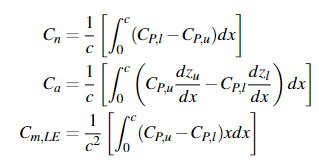

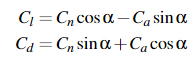

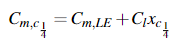


## Code
Again you see my idea behind how to formulate the data, I struggled with understanding what would be the best way of importing the surface pressure data.

In [ ]:

x_c = np.array(...)  # Non-dimensional x/c values
CP_upper = np.array(...)  # Surface pressure coefficients on the upper surface
CP_lower = np.array(...)  # Surface pressure coefficients on the lower surface

# Constants
alpha = 12  # Angle of attack in degrees
c = 1  # Chord length

# Convert alpha to radians
alpha_rad = np.radians(alpha)

# Compute surface slopes using numpy's gradient function
dz_dx_upper = np.gradient(CP_upper, x_c)
dz_dx_lower = np.gradient(CP_lower, x_c)

# Numeric integration to calculate force and moment coefficients
Cn = 1 / c * np.trapz(CP_lower - CP_upper, x_c)
Ca = 1 / c * np.trapz((CP_upper * dz_dx_upper - CP_lower * dz_dx_lower), x_c)
Cm_LE = 1 / c ** 2 * np.trapz((CP_upper - CP_lower) * x_c, x_c)

# Apply the Moment Transfer Theorem
xc_quarter_chord = 0.25
Cm_c_4 = Cm_LE + Cn * xc_quarter_chord

# XFOIL results (replace with actual XFOIL results)
Cl_xfoil = 0.7
Cd_xfoil = 0.02
Cm_xfoil = -0.05

# Print results
print("Cl Cd Cm")
print(f"XFOIL {Cl_xfoil} {Cd_xfoil} {Cm_xfoil}")
print(f"Integration {Cn} {Ca} {Cm_LE}")
print(f"Cm_c_4 {Cm_c_4}")